In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Change directory
%cd 'drive/My Drive/results/synthetic/'

/content/drive/My Drive/results/synthetic


In [3]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main  #Temporarily installed, only for this session.

     / 46.6 MB 12.9 MB/s


In [4]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [5]:
ls

AUPR_EG.pdf                             Cosine_SG.pdf
AUPR_IG.pdf                             model_params/
AUPR_Saliency.pdf                       Performance_vs_EG_AUPR.pdf
AUPR_SG.pdf                             Performance_vs_EG_AUROC.pdf
AUROC_EG.pdf                            Performance_vs_EGCosine.pdf
AUROC_IG.pdf                            Performance_vs_IG_AUPR.pdf
AUROC_Saliency.pdf                      Performance_vs_IG_AUROC.pdf
AUROC_SG.pdf                            Performance_vs_IGCosine.pdf
cnn_deep_exponential_results.pickle     Performance_vs_SaliencyAUPR.pdf
cnn_deep_relu_results.pickle            Performance_vs_SaliencyAUROC.pdf
cnn_shallow_exponential_results.pickle  Performance_vs_SaliencyCosine.pdf
cnn_shallow_relu_results.pickle         Performance_vs_SG_AUPR.pdf
Cosine_EG.pdf                           Performance_vs_SG_AUROC.pdf
Cosine_IG.pdf                           Performance_vs_SGCosine.pdf
Cosine_Saliency.pdf                     Plot_notebook.ipynb


In [6]:
import pickle
file_cnn_deep_relu = open("cnn_deep_relu_results.pickle", "rb")
file_cnn_deep_exp = open("cnn_deep_exponential_results.pickle", "rb")
file_cnn_shallow_relu = open("cnn_shallow_relu_results.pickle", "rb")
file_cnn_shallow_exp = open("cnn_shallow_exponential_results.pickle", "rb")

In [7]:
results={}

In [8]:
results['deep_relu'] = pickle.load(file_cnn_deep_relu)
results['deep_exp'] = pickle.load(file_cnn_deep_exp)
results['shallow_relu'] = pickle.load(file_cnn_shallow_relu)
results['shallow_exp'] = pickle.load(file_cnn_shallow_exp)

In [9]:
for keys in results['deep_relu']:
    print(keys)

nucleotide_ground_truth
auc
angles
saliency


In [53]:
Performance={}
Performance['deep_relu'] = np.array(results['deep_relu']['auc'])
Performance['deep_exp'] = np.array(results['deep_exp']['auc'])
Performance['shallow_relu'] = np.array(results['shallow_relu']['auc'])
Performance['shallow_exp'] = np.array(results['shallow_exp']['auc'])
print(Performance['deep_relu'].shape)

nucleotide_motif_labels = results['deep_relu']['nucleotide_ground_truth'] #Same for all models, because same data. 

(50,)


# Saliency

In [12]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['saliency']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['saliency']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['saliency']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['saliency']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['saliency']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['saliency']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['saliency']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['saliency']['adj_cos_dist'])

Improvement={}
Improvement['deep_relu']=np.array(results['deep_relu']['saliency']['improvement'])
Improvement['deep_exp']=np.array(results['deep_exp']['saliency']['improvement'])
Improvement['shallow_relu']=np.array(results['shallow_relu']['saliency']['improvement'])
Improvement['shallow_exp']=np.array(results['shallow_exp']['saliency']['improvement'])


Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['auroc_adj_scores']), axis=-1)


Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['aupr_adj_scores']), axis=-1)

Angles={}
Angles['deep_relu']=np.array(results['deep_relu']['angles'])
Angles['deep_exp']=np.array(results['deep_exp']['angles'])
Angles['shallow_relu']=np.array(results['shallow_relu']['angles'])
Angles['shallow_exp']=np.array(results['shallow_exp']['angles'])

scores_saliency = {}
scores_saliency['deep_relu']=np.array(results['deep_relu']['saliency']['scores'])
scores_saliency['deep_exp']=np.array(results['deep_exp']['saliency']['scores'])
scores_saliency['shallow_relu']=np.array(results['shallow_relu']['saliency']['scores'])
scores_saliency['shallow_exp']=np.array(results['shallow_exp']['saliency']['scores'])

scores_times_input = {}
scores_times_input['deep_relu']=np.array(results['deep_relu']['saliency']['scores_times_input'])
scores_times_input['deep_exp']=np.array(results['deep_exp']['saliency']['scores_times_input'])
scores_times_input['shallow_relu']=np.array(results['shallow_relu']['saliency']['scores_times_input'])
scores_times_input['shallow_exp']=np.array(results['shallow_exp']['saliency']['scores_times_input'])

scores_times_input_adj = {}
scores_times_input_adj['deep_relu']=np.array(results['deep_relu']['saliency']['adj_scores_times_input'])
scores_times_input_adj['deep_exp']=np.array(results['deep_exp']['saliency']['adj_scores_times_input'])
scores_times_input_adj['shallow_relu']=np.array(results['shallow_relu']['saliency']['adj_scores_times_input'])
scores_times_input_adj['shallow_exp']=np.array(results['shallow_exp']['saliency']['adj_scores_times_input'])


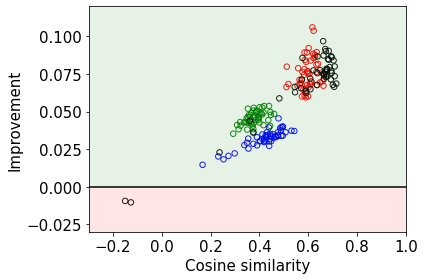

In [13]:
# Saliency Cosine
file_save = 'Cosine_Saliency.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

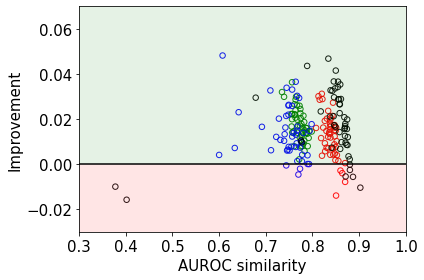

In [14]:
#Saliency AUROC
file_save = 'AUROC_Saliency.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity', file_save = file_save)

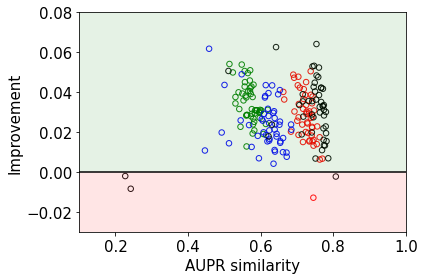

In [14]:
#Saliency AUPR
file_save = 'AUPR_Saliency.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.08, x_label = 'AUPR similarity', file_save = file_save)

Interpretability vs Performance


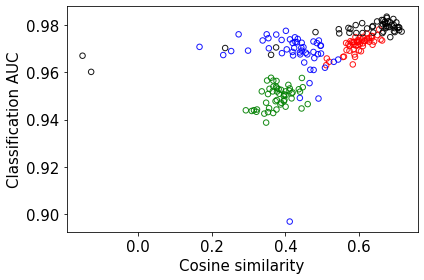

In [15]:
# Saliency Cosine
file_save = 'Performance_vs_SaliencyCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

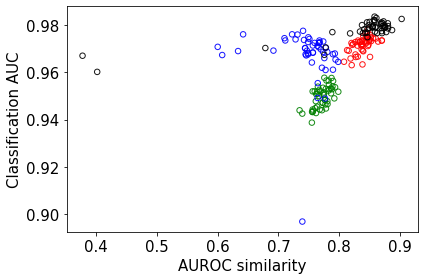

In [16]:
# SaliencyAUROC
file_save = 'Performance_vs_SaliencyAUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

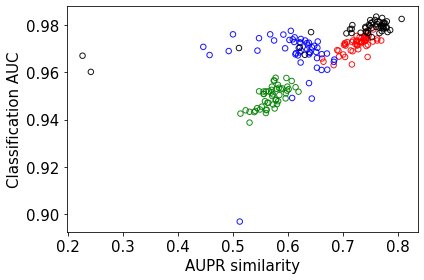

In [25]:
# SaliencyAUPR
file_save = 'Performance_vs_SaliencyAUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

# ANGLE STATISTICS

In [ ]:
print(nucleotide_motif_labels[400])

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np 

model_ = 'deep_exp'

sine = np.array(Angles[model_])
improvement =np.array(Improvement[model_])
print(sine.shape)

(50, 500, 200)


(array([3.80532683e-06, 2.12011972e-05, 4.89256306e-05, 1.04918297e-04,
        1.45146038e-04, 2.16903629e-04, 3.46829841e-04, 4.56095601e-04,
        5.65362843e-04, 6.91485200e-04, 8.39889993e-04, 8.94251805e-04,
        1.00786799e-03, 1.19487262e-03, 1.23728012e-03, 1.37317937e-03,
        1.47972852e-03, 1.59443535e-03, 1.69228682e-03, 1.82927497e-03,
        2.11684895e-03, 2.30440212e-03, 2.45172295e-03, 2.64578938e-03,
        2.81268014e-03, 3.25519224e-03, 3.63898745e-03, 4.16574564e-03,
        4.77785964e-03, 5.51882292e-03, 6.01677818e-03, 6.49134395e-03,
        7.25785325e-03, 8.09339519e-03, 8.90175619e-03, 9.55844758e-03,
        1.05489208e-02, 1.09734871e-02, 1.15029717e-02, 1.18606728e-02,
        1.23961372e-02, 1.32577728e-02, 1.41547437e-02, 1.45494109e-02,
        1.49179843e-02, 1.57845125e-02, 1.62041862e-02, 1.63101918e-02,
        1.65531894e-02, 1.68771861e-02, 1.62851854e-02, 1.57143857e-02,
        1.54224625e-02, 1.50576943e-02, 1.48206766e-02, 1.369756

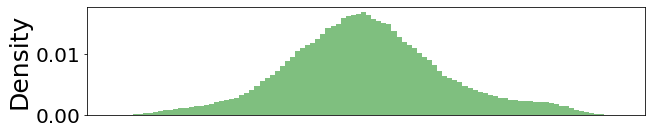

In [46]:
import matplotlib.pyplot as plt

index_positive = nucleotide_motif_labels
#Reshape (concatenate n times, where n is the number of runs, to make it the same size as sine[])
index = []
for i in range (0,len(scores_saliency[model_])):
    index.append(index_positive[:,:,0])   
index=np.array(index)    

sine_flattened = np.reshape(sine, -1)
index_flattened = np.reshape(index, -1)
sine_flattened=sine_flattened[index_flattened]

plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
#plt.xticks(fontsize=22)
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False) 
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
plt.hist(sine_flattened, 100, density=True, alpha=0.5, color='g')

(-0.75, 1.0)

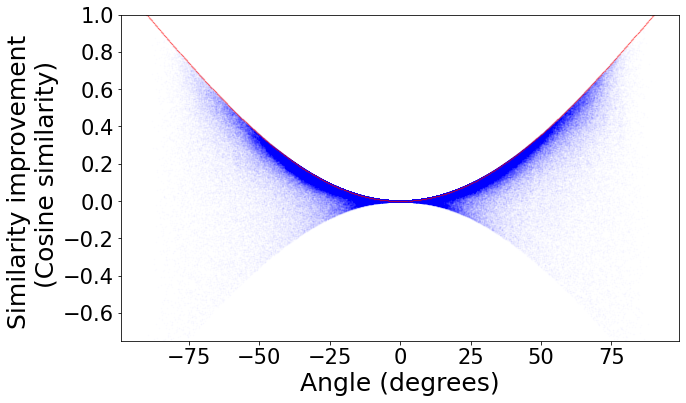

In [50]:
plt.figure(figsize=(10, 6))

index_positive = nucleotide_motif_labels
#Reshape (concatenate n times, where n is the number of runs, to make it the same size as sine[])
index = []
for i in range (0,len(scores_saliency[model_])):
    index.append(index_positive[:,:,0])   
index=np.array(index)    

plt.scatter(sine[index], improvement[index], s=0.3, c='b', marker="o", label='zadaca', alpha=0.01)  #plt.scatter(sine, improvement, s=0.3, c='b', marker="o", label='zadaca', alpha=0.01)
plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Similarity improvement \n (Cosine similarity)', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)

#Highlight bins
bin_map=np.linspace(-90,90,1000)
bin_points = 1-np.abs(np.cos(bin_map/180*3.1416))
plt.scatter(bin_map, bin_points, s=0.1, c='red', marker="o", label='zadaca', alpha=0.5)

plt.ylim(-0.75,1)           
#plt.savefig('drive/My Drive/results/U_scatter.pdf', dpi='figure')  

In [17]:
print ( np.mean(np.nan_to_num(sine_flattened)) )
print ( np.std(np.nan_to_num(sine_flattened)) )
print(sine_flattened.shape)

-0.2730994
34.97127
(5000000,)


# ANECDOTAL (last...)

In [25]:
! pip install logomaker
import logomaker

     |████████████████████████████████| 11.8 MB 10.5 MB/s 


In [24]:
saliency_map_raw #=Scores, of interest. 
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True) 

s=9 #Pick a sequence 42
run_=2

X_50=[]
for i in range (0,len(saliency_map_raw_cummulative)):
    X_50.append(X)   
X_50=np.array(X_50)  

sine_dimensionsadapted=np.expand_dims(sine,3)[run_] * np.sqrt(np.sum(np.square(saliency_map_raw),axis=2,keepdims=True))

from matplotlib.ticker import FormatStrFormatter

import logomaker 

# PLOT for p=0 parameter (default classical saliency)
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=-0.333 parameter 
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CORRECTED[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT ground truth
N, L, A = sine_dimensionsadapted.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    fig = plt.gcf()


# PLOT ground truth
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

NameError: ignored

In [ ]:
'''!pip install https://github.com/p-koo/tfomics/tarball/master

In [25]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
s=1 #Pick a sequence 42

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = adj_scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = X_model_centered[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

'''# PLOT ground truth
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()'''

NameError: ignored

# Integrated gradient

In [26]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['intgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['intgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['intgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['intgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['intgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['intgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['intgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['intgrad']['adj_cos_dist'])

Improvement={}
Improvement['deep_relu']=np.array(results['deep_relu']['intgrad']['improvement'])
Improvement['deep_exp']=np.array(results['deep_exp']['intgrad']['improvement'])
Improvement['shallow_relu']=np.array(results['shallow_relu']['intgrad']['improvement'])
Improvement['shallow_exp']=np.array(results['shallow_exp']['intgrad']['improvement'])


Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['auroc_adj_scores']), axis=-1)


Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['aupr_adj_scores']), axis=-1)

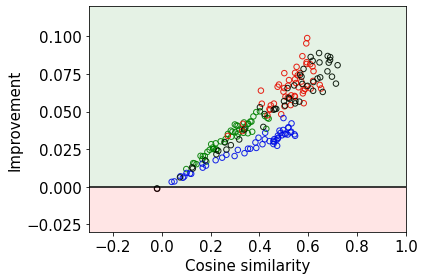

In [27]:
# IG Cosine
file_save = 'Cosine_IG.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

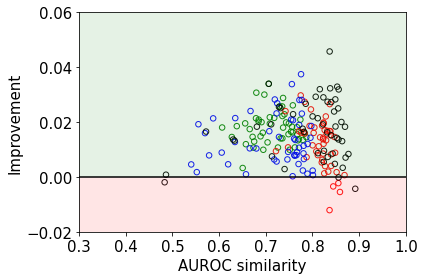

In [28]:
#IG AUROC
file_save = 'AUROC_IG.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.02, y_max=0.06, x_label = 'AUROC similarity', file_save = file_save)

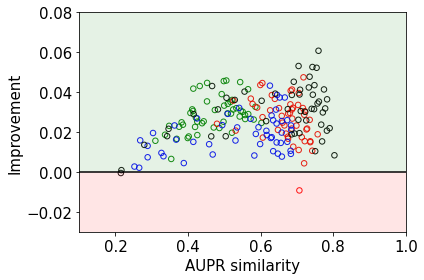

In [29]:
#IG AUPR
file_save = 'AUPR_IG.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.08, x_label = 'AUPR similarity', file_save = file_save)

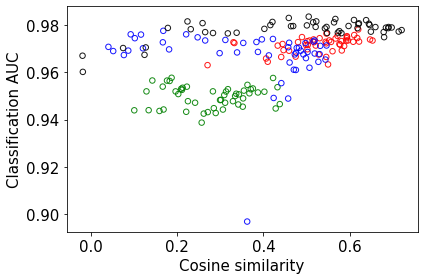

In [30]:
# IG Cosine
file_save = 'Performance_vs_IGCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

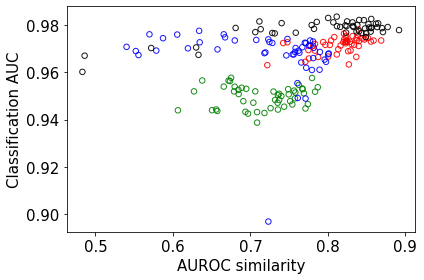

In [31]:
# IG AUROC
file_save = 'Performance_vs_IG_AUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

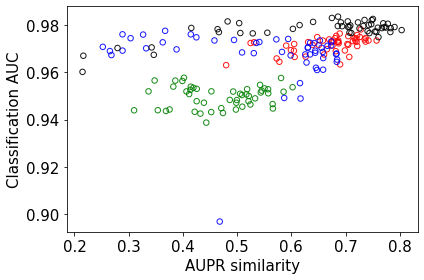

In [32]:
# IG AUPR
file_save = 'Performance_vs_IG_AUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

In [35]:
scores_saliency_onerun= np.array(scores_saliency['deep_relu'][0])
scores_intgrad_onerun= np.array(scores_intgrad['deep_relu'][0])

In [36]:
!pip install logomaker 

import logomaker

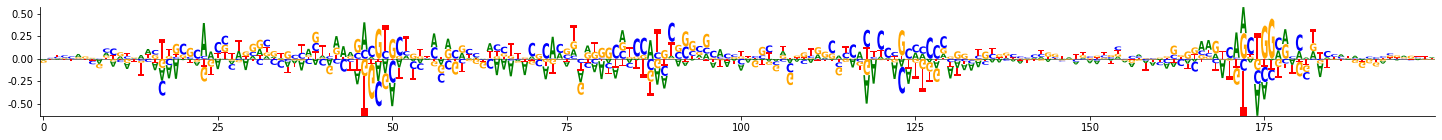

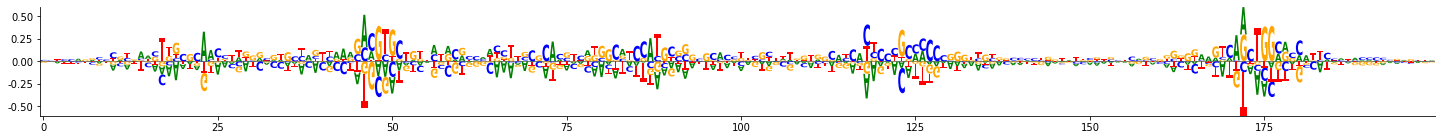

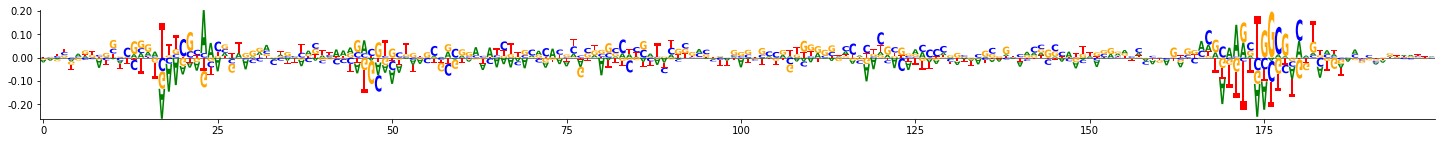

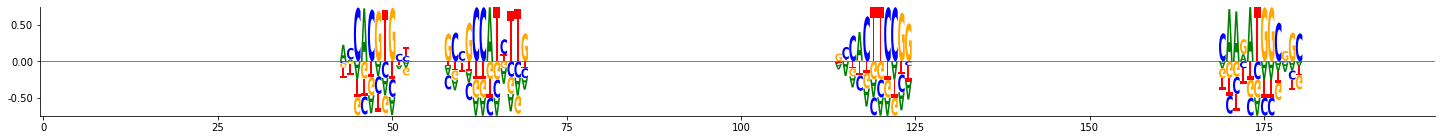

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
s=22 #Pick a sequence 42

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores_saliency_onerun.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores_saliency_onerun[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores_saliency_onerun.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (scores_saliency_onerun-0.25*np.sum(scores_saliency_onerun, axis=-1, keepdims=True))[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()



# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores_intgrad_onerun.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores_intgrad_onerun[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT for p=0 parameter (default classical saliency)
N, L, A = X_model_centered.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = X_model_centered[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


In [19]:
# Needed for X_model_centered in Logomaker plots

"""
Evaluate models on synthetic data: classification and interpretability performance.
""" 
import os
import numpy as np
from six.moves import cPickle
from tensorflow import keras
from gradient_correction import helper, explain, model_zoo, geomath

#------------------------------------------------------------------------

num_trials = 50  
model_names = ['cnn_deep', 'cnn_shallow'] 
activations = ['relu', 'exponential']  
attr_methods = ['saliency', 'intgrad'] #['saliency', 'smoothgrad', 'intgrad', 'expintgrad']

results_path = os.path.join('../results', 'synthetic')  
params_path = os.path.join(results_path, 'model_params')  

#------------------------------------------------------------------------

# load data
data_path = '../data/synthetic_code_dataset.h5'
x_train, y_train, x_valid, y_valid, x_test, y_test = helper.load_data(data_path)  

# get shapes
input_shape = x_train.shape[1:]
output_shape = y_train.shape[1]

# load ground truth values
test_model = helper.load_synthetic_models(data_path, dataset='test')
true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index][:500]  
X_model = test_model[true_index][:500]  
X_model_centered =  X_model - 0.25

# Smoothgrad

In [33]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['smoothgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['smoothgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['smoothgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['smoothgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['smoothgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['smoothgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['smoothgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['smoothgrad']['adj_cos_dist'])

Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['auroc_adj_scores']), axis=-1)

Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['aupr_adj_scores']), axis=-1)

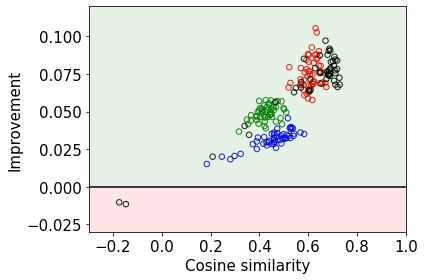

In [34]:
# SG Cosine
file_save = 'Cosine_SG.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

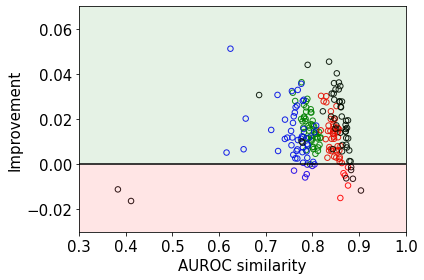

In [35]:
#SG AUROC
file_save = 'AUROC_SG.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity', file_save = file_save)

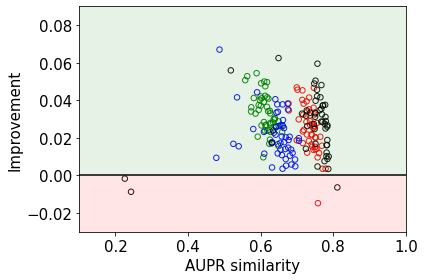

In [36]:
#SG AUPR
file_save = 'AUPR_SG.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.09, x_label = 'AUPR similarity', file_save = file_save)

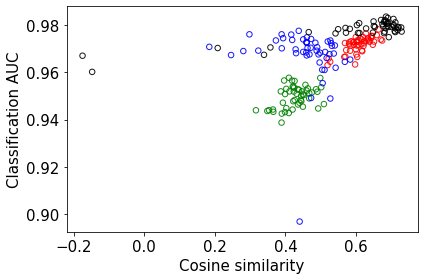

In [37]:
# SG Cosine
file_save = 'Performance_vs_SGCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

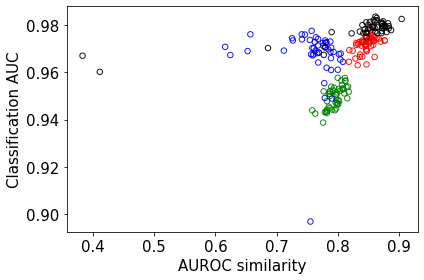

In [38]:
# SG AUROC
file_save = 'Performance_vs_SG_AUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

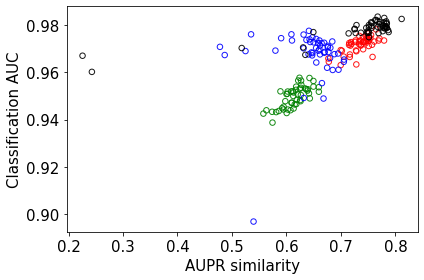

In [39]:
# SG AUPR
file_save = 'Performance_vs_SG_AUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

# Expintgrad

In [40]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['expintgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['expintgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['expintgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['expintgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['expintgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['expintgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['expintgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['expintgrad']['adj_cos_dist'])

Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['auroc_adj_scores']), axis=-1)

Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['aupr_adj_scores']), axis=-1)

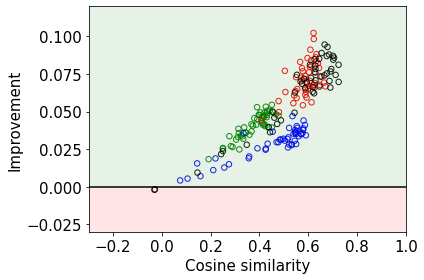

In [41]:
# EG Cosine
file_save = 'Cosine_EG.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

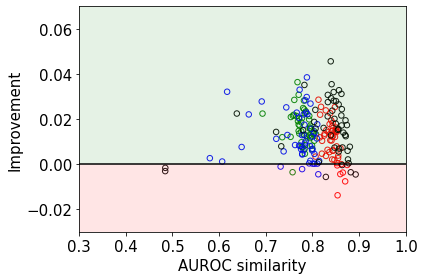

In [42]:
#EG AUROC
file_save = 'AUROC_EG.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity', file_save = file_save)

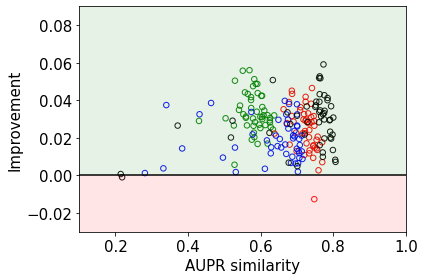

In [43]:
#EG AUPR
file_save = 'AUPR_EG.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.09, x_label = 'AUPR similarity', file_save = file_save)

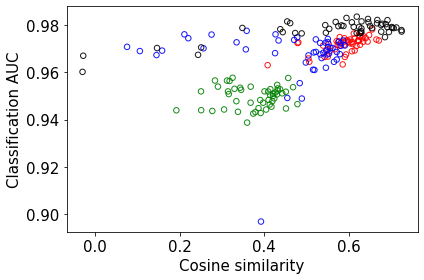

In [44]:
# EG Cosine
file_save = 'Performance_vs_EGCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

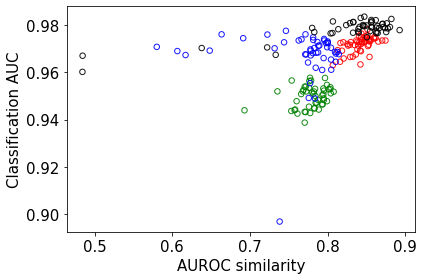

In [45]:
# EG AUROC
file_save = 'Performance_vs_EG_AUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

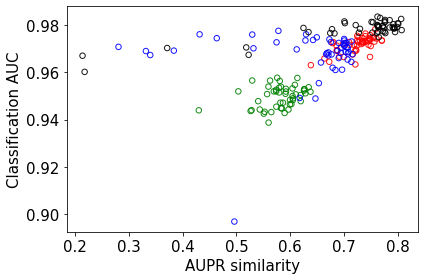

In [46]:
# EG AUPR
file_save = 'Performance_vs_EG_AUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


(-0.6, 0.8)

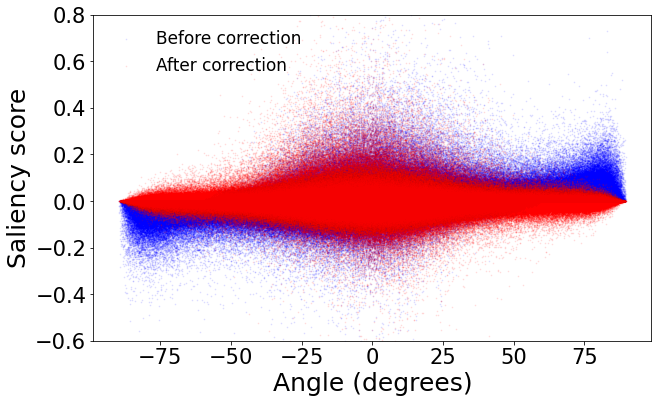

In [30]:
'''# Only negative 
import matplotlib.pyplot as plt

model_ = 'deep_exp'

sine = np.array(Angles[model_])
wild_saliency = scores_times_input[model_]
wild_saliency_adj = scores_times_input_adj[model_]

#fig = plt.figure()
#ax1 = fig.add_subplot(111)
plt.figure(figsize=(10, 6))

#DIFFERENT DEFINITION
X_model_normalized = ( np.log2(4) + np.sum(X_model*np.log2(X_model),axis=2, keepdims=True)   )
X_model_normalized_50 = []
for i in range (0,len(scores_saliency[model_])):
    X_model_normalized_50.append(X_model_normalized[:,:,0])   
X_model_normalized_50=np.array(X_model_normalized_50)    

plt.scatter(sine[X_model_normalized_50==0], wild_saliency[X_model_normalized_50==0], s=0.5, c='b', marker="o",  alpha=0.1, label='Before correction')
plt.scatter(sine[X_model_normalized_50==0], wild_saliency_adj[X_model_normalized_50==0], s=0.5, c='r', marker="o",  alpha=0.1, label='After correction')

plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Saliency score', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.legend(loc='upper left', fontsize=17, frameon=False);
plt.ylim(-0.6,0.8)

(-0.6, 0.8)

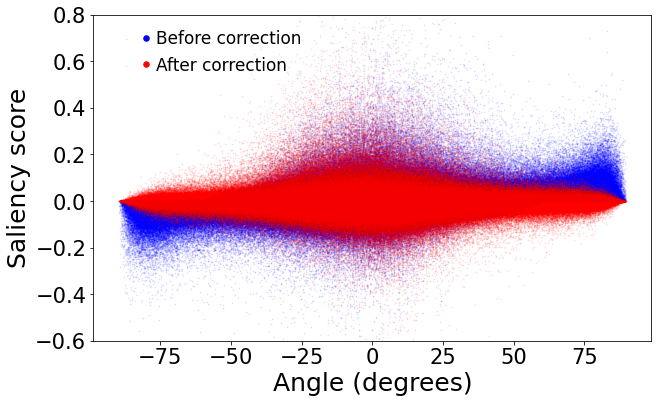

In [36]:
# Only negative (more efficient way)
import matplotlib.pyplot as plt

model_ = 'deep_exp'

sine = np.array(Angles[model_])
wild_saliency = scores_times_input[model_]
wild_saliency_adj = scores_times_input_adj[model_]
index_negative = np.logical_not(nucleotide_motif_labels)

#Reshape (concatenate n times, where n is the number of runs, to make it the same size as sine[])
index = []
for i in range (0,len(scores_saliency[model_])):
    index.append(index_negative[:,:,0])   
index=np.array(index)    

plt.figure(figsize=(10, 6))
plt.scatter(sine[index], wild_saliency[index], s=0.5, c='b', marker="o",  alpha=0.1, label='Before correction')
plt.scatter(sine[index], wild_saliency_adj[index], s=0.5, c='r', marker="o",  alpha=0.1, label='After correction')

#Label mock-points
plt.scatter(-80, 0.7, s=30, c='b', marker="o",  alpha=1)
plt.scatter(-80, 0.59, s=30, c='r', marker="o",  alpha=1)

plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Saliency score', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.legend(loc='upper left', fontsize=17, frameon=False);
plt.ylim(-0.6,0.8)

In [25]:
#print(X_model_normalized.shape)
#print(X_model_normalized_50.shape)
print(sine.shape)
#print(X_model_normalized_50[0,150]==0)
#print(scores_times_input)
print()
print(nucleotide_motif_labels.shape)
print(index_negative.shape)

(50, 500, 200)

(500, 200, 1)
(500, 200, 1)
